# **Preprocessing**

## **A. Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  2.3.2
pandas version :  2.3.2
seaborn version :  0.13.2


## **B. Import Data**

In [2]:
import os
print(os.getcwd())

d:\Dibimbing\Final Project Airbnb\notebooks


In [2]:
raw_airbnb = pd.read_csv("../data/airbnb_raw.csv")
raw_airbnb.info()
print(raw_airbnb.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  517

Dataset Airbnb ini memiliki 51.707 baris dan 21 kolom, dengan ukuran total sekitar 7,2 MB. Seluruh kolom terisi penuh tanpa nilai kosong, sehingga kualitas data pada tahap awal sudah cukup baik. Tipe data yang digunakan cukup beragam: terdapat 12 kolom numerik bertipe float64, 3 kolom numerik bertipe integer, 3 kolom kategorikal (object), serta 3 kolom boolean. Kolom numerik berisi informasi harga, kapasitas, rating, jarak ke pusat kota/metro, hingga indeks lokasi yang berkaitan dengan daya tarik wisata maupun restoran. Kolom kategorikal mencakup tipe kamar, waktu menginap (weekdays/weekends), serta nama kota, yang dapat digunakan untuk segmentasi data. Sementara itu, kolom boolean seperti room_shared, room_private, dan host_is_superhost bisa membantu analisis perbandingan antar tipe host maupun kamar.
Secara keseluruhan, struktur dataset ini cukup kaya: ada kombinasi atribut kuantitatif, kualitatif, spasial (longitude, latitude), dan indikator kualitas layanan.

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
pd.set_option("display.width", None)

In [4]:
raw_airbnb.head(10)

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,week_time,city
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,weekdays,amsterdam
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,weekdays,amsterdam
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,weekdays,amsterdam
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,weekdays,amsterdam
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,weekdays,amsterdam
5,552.808567,Private room,False,True,3.0,False,0,0,8.0,100.0,2,2.131420,1.904668,174.788957,9.255191,225.201662,15.692376,4.87699,52.38966,weekdays,amsterdam
6,215.124317,Private room,False,True,2.0,False,0,0,10.0,94.0,1,1.881092,0.729747,200.167652,10.599010,242.765524,16.916251,4.91570,52.38296,weekdays,amsterdam
7,2771.307384,Entire home/apt,False,False,4.0,True,0,0,10.0,100.0,3,1.686807,1.458404,208.808109,11.056528,272.313823,18.975219,4.88467,52.38749,weekdays,amsterdam
8,1001.804420,Entire home/apt,False,False,4.0,False,0,0,9.0,96.0,2,3.719141,1.196112,106.226456,5.624761,133.876202,9.328686,4.86459,52.40175,weekdays,amsterdam
9,276.521454,Private room,False,True,2.0,False,1,0,10.0,88.0,1,3.142361,0.924404,206.252862,10.921226,238.291258,16.604478,4.87600,52.34700,weekdays,amsterdam


In [5]:
cols = ["attr_index", "attr_index_norm", "rest_index", "rest_index_norm"]
min_max_values = raw_airbnb[cols].agg(["min", "max"]).transpose()
print(min_max_values)

                       min          max
attr_index       15.152201  4513.563486
attr_index_norm   0.926301   100.000000
rest_index       19.576924  6696.156772
rest_index_norm   0.592757   100.000000


Dalam dataset ini terdapat beberapa kolom yang sebaiknya dihapus karena bersifat redundan. Misalnya, kolom room_shared dan room_private tidak perlu dipertahankan karena informasinya sudah tercermin pada kolom room_type, sehingga hanya akan membuat data menjadi berulang. Selain itu, untuk memudahkan pembuatan chatbot travel planner, nama kolom juga sebaiknya disederhanakan agar lebih ringkas dan mudah dipahami. Contohnya, realSum bisa diganti menjadi price, guest_satisfaction_overall menjadi guest_rating, person_capacity menjadi capacity, dan cleanliness_rating menjadi cleanliness. Kolom-kolom geografis seperti lng, lat, dist, dan metro_dist tetap penting dipertahankan karena dapat digunakan untuk rekomendasi lokasi atau akses transportasi.Sementara itu, untuk kolom yang memiliki nilai asli dan nilai normalisasi seperti attr_index dan attr_index_norm atau rest_index dan rest_index_norm, cukup dipilih salah satunya sesuai kebutuhan, misalnya mempertahankan versi normalisasi agar lebih konsisten dalam perhitungan atau ranking.

## **C. Data Pre-processing**

### **1 Deleting Columns**

In [6]:
raw_airbnb.drop(columns=["room_shared", "room_private", "attr_index", "rest_index"], inplace=True)

### **2. Rename Columns**

In [7]:
raw_airbnb.rename(columns={
    "realSum": "price",
    "room_type": "room_type",
    "person_capacity": "capacity",
    "host_is_superhost": "superhost",
    "multi": "multiple_listings",
    "biz": "business_friendly",
    "cleanliness_rating": "cleanliness",
    "guest_satisfaction_overall": "overall_rating",
    "bedrooms": "bedrooms",
    "dist": "distance_to_city_center",
    "metro_dist": "distance_to_metro", 
    "attr_index_norm": "nearby_attractions",
    "rest_index_norm": "nearby_restaurants",
    "lng": "longitude",
    "lat": "latitude",
    "week_time": "day_type",
    "city": "city"
}, inplace=True)

# Cek hasil
print(raw_airbnb.head())

        price     room_type  capacity  superhost  multiple_listings  \
0  194.033698  Private room       2.0      False                  1   
1  344.245776  Private room       4.0      False                  0   
2  264.101422  Private room       2.0      False                  0   
3  433.529398  Private room       4.0      False                  0   
4  485.552926  Private room       2.0       True                  0   

   business_friendly  cleanliness  overall_rating  bedrooms  \
0                  0         10.0            93.0         1   
1                  0          8.0            85.0         1   
2                  1          9.0            87.0         1   
3                  1          9.0            90.0         2   
4                  0         10.0            98.0         1   

   distance_to_city_center  distance_to_metro  nearby_attractions  \
0                 5.022964           2.539380            4.166708   
1                 0.488389           0.239404           

### **3. Data Type Conversion**

In [8]:
raw_airbnb["capacity"] = raw_airbnb["capacity"].astype(int)
raw_airbnb["multiple_listings"] = raw_airbnb["multiple_listings"].astype(bool)
raw_airbnb["business_friendly"] = raw_airbnb["business_friendly"].astype(bool)
raw_airbnb["overall_rating"] = (raw_airbnb["overall_rating"] / 10).round(1)   # bisa dibulatkan 1 angka desimal
raw_airbnb["cleanliness"] = raw_airbnb["cleanliness"].astype(int)

### **4. Handle Missing Value**

In [9]:
raw_airbnb.isna().sum()

price                      0
room_type                  0
capacity                   0
superhost                  0
multiple_listings          0
business_friendly          0
cleanliness                0
overall_rating             0
bedrooms                   0
distance_to_city_center    0
distance_to_metro          0
nearby_attractions         0
nearby_restaurants         0
longitude                  0
latitude                   0
day_type                   0
city                       0
dtype: int64

Tidak ada missing value, sehingga tidak perlu dilakukan pengolahan terhadap missing value

### **5. Handling Duplicate Value**

In [10]:
duplicated = raw_airbnb[raw_airbnb.duplicated(keep=False)]
print(duplicated)

Empty DataFrame
Columns: [price, room_type, capacity, superhost, multiple_listings, business_friendly, cleanliness, overall_rating, bedrooms, distance_to_city_center, distance_to_metro, nearby_attractions, nearby_restaurants, longitude, latitude, day_type, city]
Index: []


Tidak ada duplicate value, sehingga tidak perlu dilakukan pengolahan terhadap duplicate value.

### **6. Feature Extraction**

In [11]:
# price per person
raw_airbnb['price_per_person'] = raw_airbnb['price'] / raw_airbnb['capacity']

# distance_category
def distance_category(dist):
    if dist < 1:
        return "Very Close"
    elif dist < 3:
        return "Close"
    elif dist < 5:
        return "Moderate"
    else:
        return "Far"

raw_airbnb['distance_category'] = raw_airbnb['distance_to_city_center'].apply(distance_category)

# satisfaction_category
def satisfaction_category(rating):
    if rating >= 9:
        return "Excellent"
    elif rating >= 7:
        return "Good"
    elif rating >= 5:
        return "Average"
    else:                
        return "Poor"

raw_airbnb['satisfaction_category'] = raw_airbnb['overall_rating'].apply(satisfaction_category)

# walk_score
def calculate_walk_score(raw_airbnb):
    df = raw_airbnb.copy()
    df['inv_to_city_center'] = 1 / (df['distance_to_city_center'] + 1)
    df['inv_distance_metro'] = 1 / (df['distance_to_metro'] + 1)
    features = ['inv_to_city_center', 'inv_distance_metro', 'nearby_attractions', 'nearby_restaurants']

    
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features, index=df.index)

    df['walk_score'] = df_scaled.mean(axis=1) * 100

    def categorize(score):
        if score >= 80:
            return "Excellent"
        elif score >= 60:
            return "Good"
        elif score >= 40:
            return "Moderate"
        else:
            return "Poor"

    df['walkability_category'] = df['walk_score'].apply(categorize)

    df.drop(columns=['inv_to_city_center', 'inv_distance_metro'], inplace=True)

    return df

raw_airbnb = calculate_walk_score(raw_airbnb)

#reputation_score
def calculate_reputation_score(raw_airbnb):
    df = raw_airbnb.copy()
    
    df['superhost_numeric'] = df['superhost'].apply(lambda x: 1 if x==True or x==1 else 0)
    
    features = ['overall_rating', 'cleanliness', 'superhost_numeric']
    
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features, index=df.index)
    
    df['reputation_score'] = df_scaled.mean(axis=1) * 100
    
    df.drop(columns=['superhost_numeric'], inplace=True)
    
    return df

raw_airbnb = calculate_reputation_score(raw_airbnb)

def reputation_category(score):
    if score >= 80:
        return "Excellent"
    elif score >= 60:
        return "Good"
    elif score >= 40:
        return "Moderate"
    else:
        return "Poor"

# Terapkan ke DataFrame
raw_airbnb['reputation_category'] = raw_airbnb['reputation_score'].apply(reputation_category)

raw_airbnb.head()

,price,room_type,capacity,superhost,multiple_listings,business_friendly,cleanliness,overall_rating,bedrooms,distance_to_city_center,distance_to_metro,nearby_attractions,nearby_restaurants,longitude,latitude,day_type,city,price_per_person,distance_category,satisfaction_category,walk_score,walkability_category,reputation_score,reputation_category
0,194.033698,Private room,2,False,True,False,10,9.3,1,5.022964,2.539380,4.166708,6.846473,4.90569,52.41772,weekdays,amsterdam,97.016849,Far,Excellent,11.589729,Poor,63.750000,Good
1,344.245776,Private room,4,False,False,False,8,8.5,1,0.488389,0.239404,33.421209,58.342928,4.90005,52.37432,weekdays,amsterdam,86.061444,Very Close,Good,59.334835,Moderate,52.083333,Moderate
2,264.101422,Private room,2,False,False,True,9,8.7,1,5.748312,3.651621,3.985908,6.646700,4.97512,52.36103,weekdays,amsterdam,132.050711,Far,Good,9.211123,Poor,57.083333,Moderate
3,433.529398,Private room,4,False,False,True,9,9.0,2,0.384862,0.439876,26.119108,60.973565,4.89417,52.37663,weekdays,amsterdam,108.382349,Very Close,Excellent,56.467034,Moderate,58.333333,Moderate
4,485.552926,Private room,2,True,False,False,10,9.8,1,0.544738,0.318693,29.272733,56.811677,4.90051,52.37508,weekdays,amsterdam,242.776463,Very Close,Excellent,55.955034,Moderate,99.166667,Excellent


In [12]:
raw_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    51707 non-null  float64
 1   room_type                51707 non-null  object 
 2   capacity                 51707 non-null  int64  
 3   superhost                51707 non-null  bool   
 4   multiple_listings        51707 non-null  bool   
 5   business_friendly        51707 non-null  bool   
 6   cleanliness              51707 non-null  int64  
 7   overall_rating           51707 non-null  float64
 8   bedrooms                 51707 non-null  int64  
 9   distance_to_city_center  51707 non-null  float64
 10  distance_to_metro        51707 non-null  float64
 11  nearby_attractions       51707 non-null  float64
 12  nearby_restaurants       51707 non-null  float64
 13  longitude                51707 non-null  float64
 14  latitude              

Saya memilih untuk membuat kolom tambahan di bawah ini dengan alasan sebagai berikut:
1. price_per_person: Menunjukkan biaya rata-rata per orang agar lebih mudah dibandingkan.
2. distance_category : Mengelompokkan lokasi properti berdasarkan jarak ke pusat kota
3. satisfaction_category : Mengkategorikan properti berdasarkan tingkat kepuasan tamu.
4. walk_score : Menilai kenyamanan lokasi properti untuk dijangkau dengan berjalan kaki.
5. reputation_score : kolom baru yang digunakan untuk menggabungkan beberapa indikator kualitas (kebersihan, kepuasan tamu, dan status superhost) menjadi satu skor tunggal yang merepresentasikan reputasi properti secara keseluruhan.

### **7. Save Database**

In [13]:
raw_airbnb.to_csv('airbnb_cleaned.csv', index=False)

### **8. Heatmap (Correlation)**

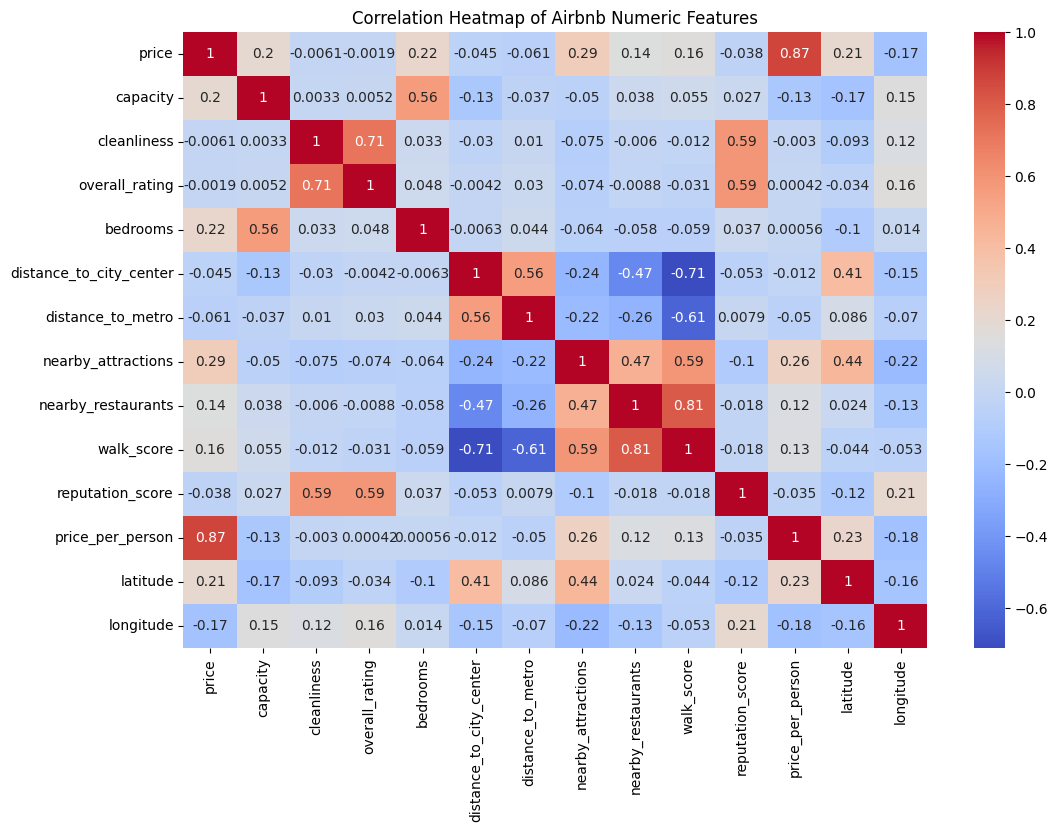

In [14]:
numeric_cols = ['price', 'capacity', 'cleanliness', 'overall_rating', 'bedrooms',
                'distance_to_city_center', 'distance_to_metro', 
                'nearby_attractions', 'nearby_restaurants', 'walk_score', 'reputation_score', 'price_per_person', 'latitude', 'longitude']

plt.figure(figsize=(12,8))
sns.heatmap(raw_airbnb[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Airbnb Numeric Features")
plt.show()

### **9. Feature Engineering**

In [15]:
# Label Encoding
le_bool = LabelEncoder()
for col in ['superhost', 'multiple_listings', 'business_friendly']:
    raw_airbnb[col] = le_bool.fit_transform(raw_airbnb[col])

distance_mapping = {'Very Close': 0, 'Close': 1, 'Far': 2, 'Very Far': 3}
walkability_mapping = {'Poor': 0, 'Moderate': 1, 'Good': 2, 'Excellent': 3}
reputation_mapping = {'Poor': 0, 'Moderate': 1, 'Good': 2, 'Excellent': 3}
satisfaction_mapping = {'Poor': 0, 'Moderate': 1, 'Good': 2, 'Excellent': 3}

raw_airbnb['distance_category'] = raw_airbnb['distance_category'].map(distance_mapping)
raw_airbnb['walkability_category'] = raw_airbnb['walkability_category'].map(walkability_mapping)
raw_airbnb['reputation_category'] = raw_airbnb['reputation_category'].map(reputation_mapping)
raw_airbnb['satisfaction_category'] = raw_airbnb['satisfaction_category'].map(satisfaction_mapping)

# One-Hot Encoding
ohe_cols = ['room_type', 'city']
raw_airbnb = pd.get_dummies(raw_airbnb, columns=ohe_cols, drop_first=True)

print(raw_airbnb.head())

        price  capacity  superhost  multiple_listings  business_friendly  \
0  194.033698         2          0                  1                  0   
1  344.245776         4          0                  0                  0   
2  264.101422         2          0                  0                  1   
3  433.529398         4          0                  0                  1   
4  485.552926         2          1                  0                  0   

   cleanliness  overall_rating  bedrooms  distance_to_city_center  \
0           10             9.3         1                 5.022964   
1            8             8.5         1                 0.488389   
2            9             8.7         1                 5.748312   
3            9             9.0         2                 0.384862   
4           10             9.8         1                 0.544738   

   distance_to_metro  nearby_attractions  nearby_restaurants  longitude  \
0           2.539380            4.166708            6

In [16]:
day_type_mapping = {'weekdays': 1, 'weekends': 2}
raw_airbnb['day_type'] = raw_airbnb['day_type'].map(day_type_mapping)

print(raw_airbnb['day_type'].value_counts())
print(raw_airbnb['day_type'].dtype)


day_type
2    26207
1    25500
Name: count, dtype: int64
int64


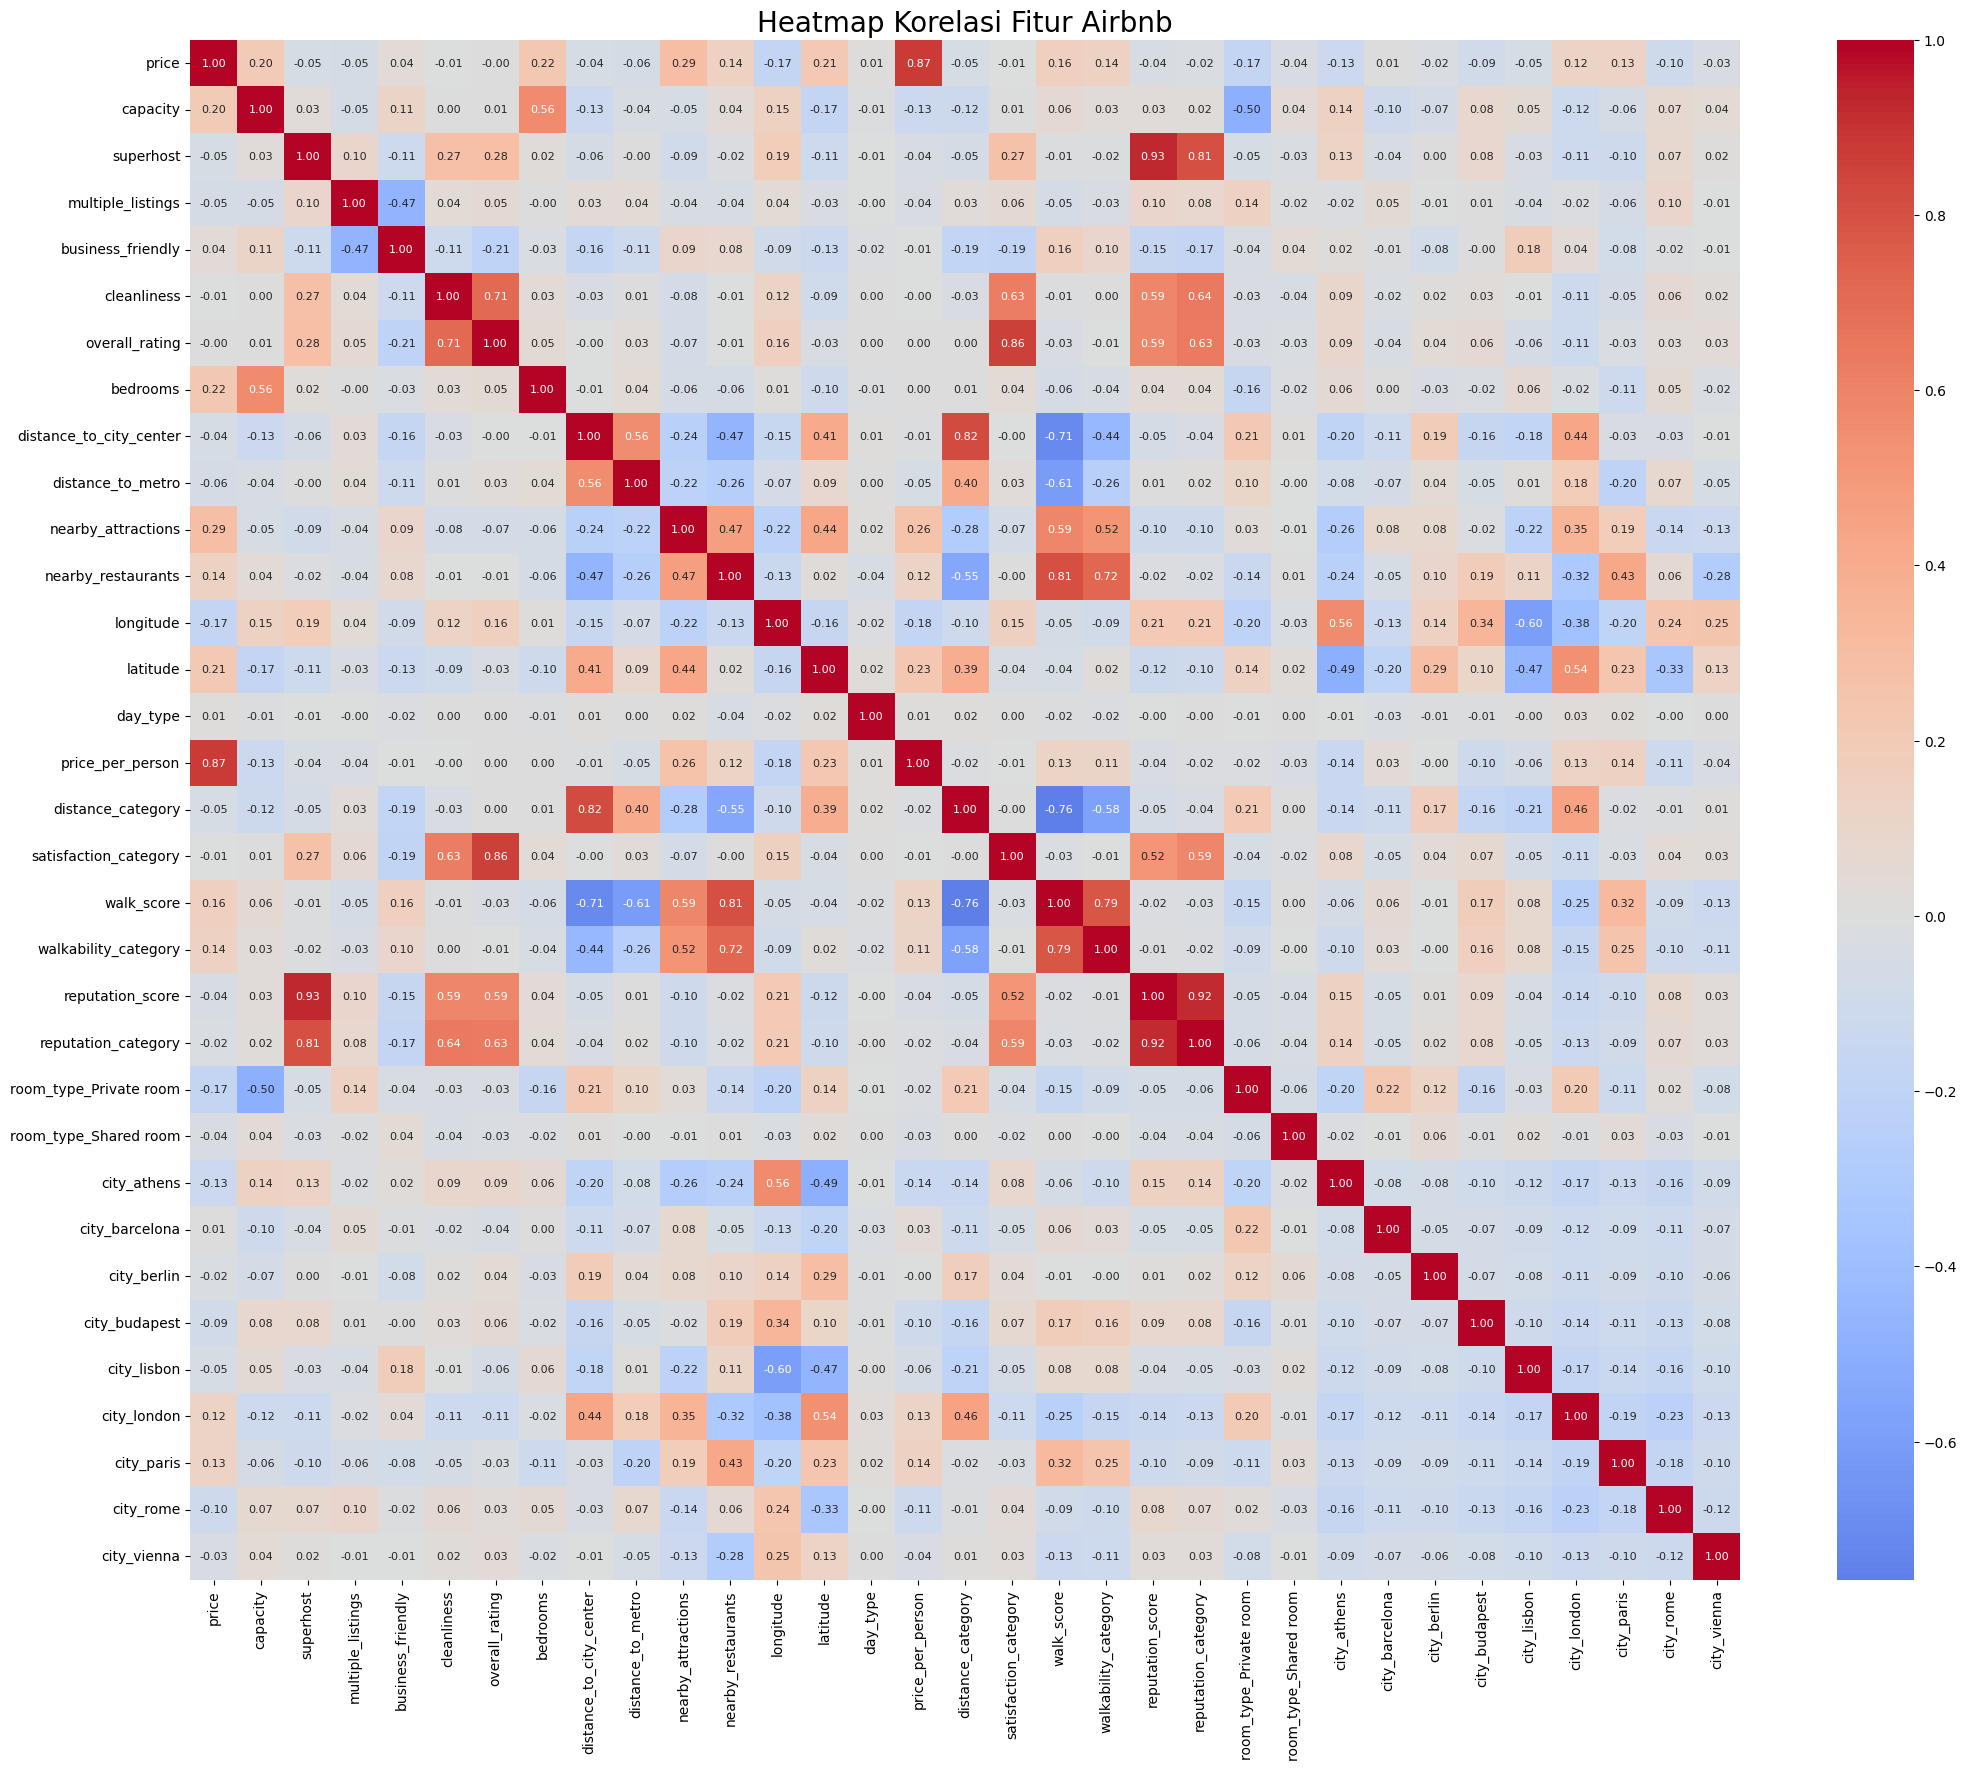

In [21]:
corr = raw_airbnb.corr(numeric_only=True)

plt.figure(figsize=(25, 20))  # atur lebar x tinggi
sns.heatmap(
    corr,
    annot=True,       # tampilkan angka
    fmt=".2f",        # format angka (2 decimal)
    cmap="coolwarm",
    center=0,
    annot_kws={"size":8}  # ukuran font angka
)

plt.title("Heatmap Korelasi Fitur Airbnb", fontsize=20)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.show()


In [22]:
from sklearn.linear_model import LinearRegression

def calculate_vif(X: pd.DataFrame):
    """
    Hitung Variance Inflation Factor (VIF) untuk setiap kolom numerik di DataFrame.
    """
    vif_data = []
    X = X.dropna().reset_index(drop=True)  # pastikan tidak ada NaN
    
    for i in range(X.shape[1]):
        y = X.iloc[:, i]
        X_others = X.drop(X.columns[i], axis=1)
        
        model = LinearRegression().fit(X_others, y)
        r2 = model.score(X_others, y)
        vif = 1 / (1 - r2) if r2 < 1 else np.inf
        vif_data.append((X.columns[i], vif))
    
    return pd.DataFrame(vif_data, columns=["feature", "VIF"])


In [23]:
X = raw_airbnb.select_dtypes(include=['int64', 'float64']).copy()

# buang target, misalnya 'price'
X = X.drop(columns=['price'], errors='ignore')

# hitung VIF
vif_df = calculate_vif(X)
print(vif_df.sort_values(by="VIF", ascending=False))

                    feature        VIF
1                 superhost        inf
4               cleanliness        inf
5            overall_rating        inf
19         reputation_score        inf
17               walk_score  20.692560
20      reputation_category   7.891720
15        distance_category   5.360058
7   distance_to_city_center   5.349131
10       nearby_restaurants   4.746508
18     walkability_category   3.927946
16    satisfaction_category   3.813775
8         distance_to_metro   3.548106
9        nearby_attractions   2.870778
12                 latitude   2.131272
0                  capacity   1.632555
6                  bedrooms   1.547826
3         business_friendly   1.492314
2         multiple_listings   1.335144
11                longitude   1.238909
14         price_per_person   1.155780
13                 day_type   1.003904
